<a href="https://colab.research.google.com/github/aholloman79/A-Primer-on-Scientific-Programming-with-Python/blob/master/Stepwise_Selection_in_Finance_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Forward Stepwise Selection Process:
Added X4 | RSS: 1740.3785
Added X10 | RSS: 953.5109
Added X2 | RSS: 568.7921
Added X8 | RSS: 300.0063
Added X1 | RSS: 94.5343
Added X3 | RSS: 81.5846
Added X7 | RSS: 80.0569
Added X5 | RSS: 79.8864
Added X9 | RSS: 79.7837
Added X6 | RSS: 79.7806

Best Forward Model: Predictors: ['X4', 'X10', 'X2', 'X8', 'X1', 'X3', 'X7', 'X5', 'X9', 'X6'], RSS: 79.7806

Backward Stepwise Selection Process:
Removed X6 | RSS: 79.7837
Removed X9 | RSS: 79.8864
Removed X5 | RSS: 80.0569
Removed X7 | RSS: 81.5846
Removed X3 | RSS: 94.5343
Removed X1 | RSS: 300.0063
Removed X8 | RSS: 568.7921
Removed X2 | RSS: 953.5109
Removed X10 | RSS: 1740.3785

Best Backward Model: Predictors: ['X1', 'X2', 'X3', 'X4', 'X5', 'X7', 'X8', 'X9', 'X10'], RSS: 79.7837

Summary of Stepwise Selection:
Forward Stepwise Selected Predictors: ['X4', 'X10', 'X2', 'X8', 'X1', 'X3', 'X7', 'X5', 'X9', 'X6']
Backward Stepwise Selected Predictors: ['X1', 'X2', 'X3', 'X4', 'X5', 'X7', 'X8', 'X9', 'X10']

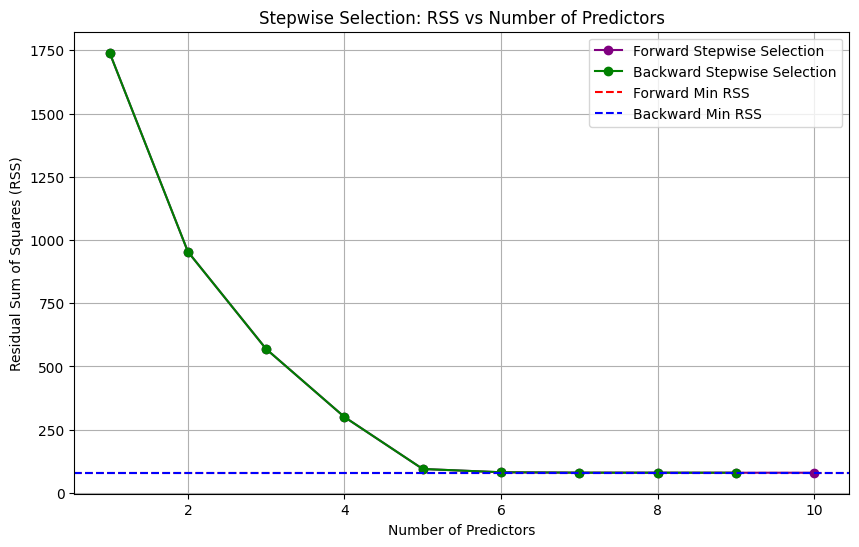

In [3]:

# Step 1: Importing Required Libraries
# I began by importing the essential libraries to handle data, build models, and perform stepwise selection.
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from itertools import combinations
import matplotlib.pyplot as plt # Importing matplotlib.pyplot and giving it the alias 'plt'

# Step 2: Generating Synthetic Financial Data
# I decided to create synthetic data to mimic financial indicators (predictors)
# and stock returns (response variable). This mirrors a real-world financial modeling scenario.

np.random.seed(123)  # I set the seed for reproducibility.
n_samples = 100      # I chose 100 observations, like time periods or companies.
n_features = 10      # I simulated 10 financial predictors, such as interest rates or inflation.

# Generating predictors (e.g., economic indicators)
X = np.random.normal(size=(n_samples, n_features))

# Defining true coefficients to simulate the underlying relationships
true_coefficients = np.array([1.2, -2.0, 0.5, 3.0, 0, 0, 0, -1.5, 0, 2.5])

# Simulating the response variable (e.g., stock returns) with added noise
Y = np.dot(X, true_coefficients) + np.random.normal(scale=1.0, size=n_samples)

# Converting data into a pandas DataFrame for easier handling
columns = [f"X{i+1}" for i in range(n_features)]
data = pd.DataFrame(X, columns=columns)
data['Y'] = Y

# Step 3: Defining Helper Functions for Stepwise Selection
# I created helper functions for forward and backward stepwise selection.
# These functions will iteratively add or remove predictors based on model performance.

def forward_stepwise_selection(data, response):
    """Performs forward stepwise selection."""
    predictors = list(data.columns)
    predictors.remove(response)
    selected_predictors = []
    remaining_predictors = predictors
    best_models = []

    print("\nForward Stepwise Selection Process:")
    while remaining_predictors:
        scores = []
        for predictor in remaining_predictors:
            # I tested each predictor by adding it to the current model
            current_predictors = selected_predictors + [predictor]
            X_subset = data[current_predictors]
            model = LinearRegression().fit(X_subset, data[response])
            y_pred = model.predict(X_subset)
            rss = mean_squared_error(data[response], y_pred) * len(y_pred)
            scores.append((predictor, rss))

        # Finding the best predictor to add
        best_predictor, best_rss = min(scores, key=lambda x: x[1])
        selected_predictors.append(best_predictor)
        remaining_predictors.remove(best_predictor)
        best_models.append((list(selected_predictors), best_rss))

        print(f"Added {best_predictor} | RSS: {best_rss:.4f}")

    return best_models


def backward_stepwise_selection(data, response):
    """Performs backward stepwise selection."""
    predictors = list(data.columns)
    predictors.remove(response)
    selected_predictors = predictors
    best_models = []

    print("\nBackward Stepwise Selection Process:")
    while len(selected_predictors) > 1:
        scores = []
        for predictor in selected_predictors:
            # I tested each predictor by removing it from the current model
            current_predictors = [p for p in selected_predictors if p != predictor]
            X_subset = data[current_predictors]
            model = LinearRegression().fit(X_subset, data[response])
            y_pred = model.predict(X_subset)
            rss = mean_squared_error(data[response], y_pred) * len(y_pred)
            scores.append((predictor, rss))

        # Finding the worst predictor to remove
        worst_predictor, best_rss = min(scores, key=lambda x: x[1])
        selected_predictors.remove(worst_predictor)
        best_models.append((list(selected_predictors), best_rss))

        print(f"Removed {worst_predictor} | RSS: {best_rss:.4f}")

    return best_models


# Step 4: Applying Forward Stepwise Selection
# I applied forward stepwise selection to identify the best predictors for predicting stock returns.
forward_models = forward_stepwise_selection(data, 'Y')

# I looked at the final model and its performance.
best_forward_model = min(forward_models, key=lambda x: x[1])
print(f"\nBest Forward Model: Predictors: {best_forward_model[0]}, RSS: {best_forward_model[1]:.4f}")

# Step 5: Applying Backward Stepwise Selection
# I also applied backward stepwise selection to start with all predictors and eliminate irrelevant ones.
backward_models = backward_stepwise_selection(data, 'Y')

# I looked at the final model and its performance.
best_backward_model = min(backward_models, key=lambda x: x[1])
print(f"\nBest Backward Model: Predictors: {best_backward_model[0]}, RSS: {best_backward_model[1]:.4f}")

# Step 6: Summary of Results
# After running both methods, I compared the predictors selected by forward and backward stepwise selection.
print("\nSummary of Stepwise Selection:")
print(f"Forward Stepwise Selected Predictors: {best_forward_model[0]}")
print(f"Backward Stepwise Selected Predictors: {best_backward_model[0]}")


# Step 7: Visualizing Stepwise Selection Results
# I extracted the number of predictors and RSS values from both forward and backward methods
forward_steps = [len(model[0]) for model in forward_models]
forward_rss = [model[1] for model in forward_models]

backward_steps = [len(model[0]) for model in backward_models]
backward_rss = [model[1] for model in backward_models]

# Plotting the RSS for both forward and backward stepwise selection
plt.figure(figsize=(10, 6))

# Forward Stepwise Selection Curve
plt.plot(forward_steps, forward_rss, marker='o', linestyle='-', color='purple', label="Forward Stepwise Selection")

# Backward Stepwise Selection Curve
plt.plot(backward_steps, backward_rss, marker='o', linestyle='-', color='green', label="Backward Stepwise Selection")

# Annotating the Minimum RSS for both methods
plt.axhline(y=min(forward_rss), color='red', linestyle='--', label="Forward Min RSS")
plt.axhline(y=min(backward_rss), color='blue', linestyle='--', label="Backward Min RSS")

# Adding labels and title
plt.xlabel("Number of Predictors")
plt.ylabel("Residual Sum of Squares (RSS)")
plt.title("Stepwise Selection: RSS vs Number of Predictors")
plt.legend()
plt.grid(True)

# Displaying the graph
plt.show()
